# Thailand Stock Trading Notebook

Welcome to the **Thailand Stock Trading Notebook** (version 1).  
This notebook is designed to help you analyze and backtest trading strategies on the Thai stock market using the powerful `ezyquant` library.
1. find the most net_profit gain between Q1 2024 and Q1 2025 (top 10 stocks)
2. buy and hold strategy

---

- 📈 **Market:** Thailand's stock
- 🛠️ **Tools:** Python, ezyquant, Jupyter Notebook
- 💡 **Purpose:** Data analysis, signal creation, and backtesting for Thai stocks

---

Let's get started and explore trading opportunities in the Thai stock market! 🚀

### First import useful library

In [ ]:
!pip install ezyquant

In [172]:
# import
import ezyquant as ez
from ezyquant.backtesting.account import SETAccount
from ezyquant.backtesting import Context

In [173]:
# connect to database
database_path = "C:\\Users\\siraw\\Downloads\\ezyquant\\ezyquant.db"
ez.connect_sqlite(database_path)

In [174]:
# data reader 
ssc = ez.SETSignalCreator(
   start_date="2023-01-01", # วันที่ต้องการเริ่มดึง data
   end_date="2025-06-01", # วันที่สิ้นสุดการดึง data
   index_list=['SET'], # list index ที่ต้องการจะดึงข้อมูล ถ้าไม่ต้องการให้ใส่ list ว่าง
   symbol_list= [] # list หุ้นที่ต้องการจะดึง ถ้าไม่ต้องการให้ใส่ list ว่าง
)

In [175]:
# Industry list
industry = ['AGRO','CONSUMP','FINCIAL','INDUS','PROPCON','RESOURC','SERVICE','TECH']

## First find stock before trade using net profit

In [176]:
np_df = ssc.get_data(
    field="net_profit", timeframe="quarterly" , method = "sum"
)

In [177]:
np_df

,2S,3BBIF,3K-BAT,A,A5,AAI,AAV,ACC,ACE,ACG,...,WORK,WORLD,WP,WPH,WSOL,XBIO,XPG,XYZ,ZAA,ZEN
2023-01-03,-134740000.0,NaN,79034000.0,-37071000.0,-4350410.0,195159000.0,-4.050233e+09,-12493910.0,381493380.0,5206330.0,...,65531000.0,17098930.0,46179940.0,48097000.0,5.006760e+08,-99890000.0,1431870.0,-1291000.0,5985000.0,50820000.0
2023-01-04,-134740000.0,NaN,79034000.0,-37071000.0,-4350410.0,195159000.0,-4.050233e+09,-12493910.0,381493380.0,5206330.0,...,65531000.0,17098930.0,46179940.0,48097000.0,5.006760e+08,-99890000.0,1431870.0,-1291000.0,5985000.0,50820000.0
2023-01-05,-134740000.0,NaN,79034000.0,-37071000.0,-4350410.0,195159000.0,-4.050233e+09,-12493910.0,381493380.0,5206330.0,...,65531000.0,17098930.0,46179940.0,48097000.0,5.006760e+08,-99890000.0,1431870.0,-1291000.0,5985000.0,50820000.0
2023-01-06,-134740000.0,NaN,79034000.0,-37071000.0,-4350410.0,195159000.0,-4.050233e+09,-12493910.0,381493380.0,5206330.0,...,65531000.0,17098930.0,46179940.0,48097000.0,5.006760e+08,-99890000.0,1431870.0,-1291000.0,5985000.0,50820000.0
2023-01-09,-134740000.0,NaN,79034000.0,-37071000.0,-4350410.0,195159000.0,-4.050233e+09,-12493910.0,381493380.0,5206330.0,...,65531000.0,17098930.0,46179940.0,48097000.0,5.006760e+08,-99890000.0,1431870.0,-1291000.0,5985000.0,50820000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,64673000.0,NaN,-85632000.0,-199762000.0,30344000.0,258647000.0,1.387226e+09,-21208000.0,226122880.0,10662880.0,...,-24106000.0,471300.0,38703220.0,178523000.0,-1.365533e+09,-62507540.0,62994780.0,-66274000.0,-8653000.0,12757000.0
2025-05-27,64673000.0,NaN,-85632000.0,-199762000.0,30344000.0,258647000.0,1.387226e+09,-21208000.0,226122880.0,10662880.0,...,-24106000.0,471300.0,38703220.0,178523000.0,-1.365533e+09,-62507540.0,62994780.0,-66274000.0,-8653000.0,12757000.0
2025-05-28,64673000.0,NaN,-85632000.0,-199762000.0,30344000.0,258647000.0,1.387226e+09,-21208000.0,226122880.0,10662880.0,...,-24106000.0,471300.0,38703220.0,178523000.0,-1.365533e+09,-62507540.0,62994780.0,-66274000.0,-8653000.0,12757000.0
2025-05-29,64673000.0,NaN,-85632000.0,-199762000.0,30344000.0,258647000.0,1.387226e+09,-21208000.0,226122880.0,10662880.0,...,-24106000.0,471300.0,38703220.0,178523000.0,-1.365533e+09,-62507540.0,62994780.0,-66274000.0,-8653000.0,12757000.0


In [178]:
np_df.index

DatetimeIndex(['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-16',
               ...
               '2025-05-19', '2025-05-20', '2025-05-21', '2025-05-22',
               '2025-05-23', '2025-05-26', '2025-05-27', '2025-05-28',
               '2025-05-29', '2025-05-30'],
              dtype='datetime64[ns]', length=587, freq=None)

In [179]:
np_df.columns

Index(['2S', '3BBIF', '3K-BAT', 'A', 'A5', 'AAI', 'AAV', 'ACC', 'ACE', 'ACG',
       ...
       'WORK', 'WORLD', 'WP', 'WPH', 'WSOL', 'XBIO', 'XPG', 'XYZ', 'ZAA',
       'ZEN'],
      dtype='object', length=745)

In [180]:
import pandas as pd
import numpy as np

In [181]:
np_df_t = np_df.T
np_df_t

,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-16,...,2025-05-19,2025-05-20,2025-05-21,2025-05-22,2025-05-23,2025-05-26,2025-05-27,2025-05-28,2025-05-29,2025-05-30
2S,-134740000.0,-134740000.0,-134740000.0,-134740000.0,-134740000.0,-134740000.0,-134740000.0,-134740000.0,-134740000.0,-134740000.0,...,64673000.0,64673000.0,64673000.0,64673000.0,64673000.0,64673000.0,64673000.0,64673000.0,64673000.0,64673000.0
3BBIF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3K-BAT,79034000.0,79034000.0,79034000.0,79034000.0,79034000.0,79034000.0,79034000.0,79034000.0,79034000.0,79034000.0,...,-85632000.0,-85632000.0,-85632000.0,-85632000.0,-85632000.0,-85632000.0,-85632000.0,-85632000.0,-85632000.0,-85632000.0
A,-37071000.0,-37071000.0,-37071000.0,-37071000.0,-37071000.0,-37071000.0,-37071000.0,-37071000.0,-37071000.0,-37071000.0,...,-199762000.0,-199762000.0,-199762000.0,-199762000.0,-199762000.0,-199762000.0,-199762000.0,-199762000.0,-199762000.0,-199762000.0
A5,-4350410.0,-4350410.0,-4350410.0,-4350410.0,-4350410.0,-4350410.0,-4350410.0,-4350410.0,-4350410.0,-4350410.0,...,30344000.0,30344000.0,30344000.0,30344000.0,30344000.0,30344000.0,30344000.0,30344000.0,30344000.0,30344000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XBIO,-99890000.0,-99890000.0,-99890000.0,-99890000.0,-99890000.0,-99890000.0,-99890000.0,-99890000.0,-99890000.0,-99890000.0,...,-62507540.0,-62507540.0,-62507540.0,-62507540.0,-62507540.0,-62507540.0,-62507540.0,-62507540.0,-62507540.0,-62507540.0
XPG,1431870.0,1431870.0,1431870.0,1431870.0,1431870.0,1431870.0,1431870.0,1431870.0,1431870.0,1431870.0,...,62994780.0,62994780.0,62994780.0,62994780.0,62994780.0,62994780.0,62994780.0,62994780.0,62994780.0,62994780.0
XYZ,-1291000.0,-1291000.0,-1291000.0,-1291000.0,-1291000.0,-1291000.0,-1291000.0,-1291000.0,-1291000.0,-1291000.0,...,-66274000.0,-66274000.0,-66274000.0,-66274000.0,-66274000.0,-66274000.0,-66274000.0,-66274000.0,-66274000.0,-66274000.0
ZAA,5985000.0,5985000.0,5985000.0,5985000.0,5985000.0,5985000.0,5985000.0,5985000.0,5985000.0,5985000.0,...,-8653000.0,-8653000.0,-8653000.0,-8653000.0,-8653000.0,-8653000.0,-8653000.0,-8653000.0,-8653000.0,-8653000.0


In [182]:
new_df = pd.DataFrame(index = np_df_t.index)
new_df['Q1 2024'] = np_df_t['2024-03-25']
new_df['Q1 2025'] = np_df_t['2025-03-25']
new_df.dropna()

,Q1 2024,Q1 2025
2S,17353000.0,9518000.0
3K-BAT,-23401000.0,-85632000.0
A,-122109060.0,-211447650.0
A5,158709740.0,-35614650.0
AAI,166190280.0,172528340.0
...,...,...
XBIO,-64885430.0,-134819620.0
XPG,34144780.0,46132680.0
XYZ,43259590.0,-28967160.0
ZAA,-53958390.0,-88732870.0


In [183]:
new_df = new_df.loc[(new_df['Q1 2024'] > 0) & (new_df['Q1 2025'] > 0)]
new_df

,Q1 2024,Q1 2025
2S,1.735300e+07,9518000.0
AAI,1.661903e+08,172528340.0
AAV,2.813632e+09,356583000.0
ACE,1.648649e+08,253374910.0
ACG,2.768320e+06,7298840.0
...,...,...
WORLD,3.272012e+07,471300.0
WP,3.464189e+07,36638270.0
WPH,4.239057e+07,67376630.0
XPG,3.414478e+07,46132680.0


In [184]:
new_df['%_change'] = (new_df['Q1 2025'] - new_df['Q1 2024'])/new_df['Q1 2024']
new_df = new_df.dropna()
new_df

,Q1 2024,Q1 2025,%_change
2S,1.735300e+07,9518000.0,-0.451507
AAI,1.661903e+08,172528340.0,0.038137
AAV,2.813632e+09,356583000.0,-0.873266
ACE,1.648649e+08,253374910.0,0.536864
ACG,2.768320e+06,7298840.0,1.636559
...,...,...,...
WORLD,3.272012e+07,471300.0,-0.985596
WP,3.464189e+07,36638270.0,0.057629
WPH,4.239057e+07,67376630.0,0.589425
XPG,3.414478e+07,46132680.0,0.351090


In [185]:
# find maximum net_profit growth
ans = new_df.sort_values(by='%_change', ascending=[False])
ans.head(20)

,Q1 2024,Q1 2025,%_change
CPF,121068000.0,4.172528e+09,33.464334
BKD,2063260.0,5.919459e+07,27.689836
SGC,3368790.0,5.943086e+07,16.641604
OR,192933100.0,2.999370e+09,14.546168
JTS,9614380.0,1.428176e+08,13.854587
CH,1546720.0,2.043665e+07,12.212896
GGC,14048590.0,1.503031e+08,9.698801
TFM,14834000.0,1.509650e+08,9.176958
HTECH,4058340.0,3.692197e+07,8.097801
FTI,1947410.0,1.660912e+07,7.528825


## Next Step: Portfolio Optimization with MPT

Now that we have ranked stocks by net profit growth, the next step is to select the top ten stocks based on this ranking.  
We will then apply the Modern Portfolio Theory (MPT) model to determine the optimal allocation ratio for each stock in the portfolio.  
The goal is to maximize the expected return while considering the risk, resulting in the highest possible return for the given risk level.

Let's proceed to construct and optimize our portfolio!

In [186]:
top_ten = ans.index[:10].tolist()
top_ten

['CPF', 'BKD', 'SGC', 'OR', 'JTS', 'CH', 'GGC', 'TFM', 'HTECH', 'FTI']

In [187]:
ssc2 = ez.SETSignalCreator(
   start_date="2018-01-01", # วันที่ต้องการเริ่มดึง data
   end_date="2025-06-01", # วันที่สิ้นสุดการดึง data
   index_list=['SET'], # list index ที่ต้องการจะดึงข้อมูล ถ้าไม่ต้องการให้ใส่ list ว่าง
   symbol_list= top_ten # list หุ้นที่ต้องการจะดึง ถ้าไม่ต้องการให้ใส่ list ว่าง
)
close_topten_df = ssc2.get_data("close", "daily")
close_topten_df

,2S,3BBIF,3K-BAT,A,A5,AAI,AAV,ABPIF,ACC,ACE,...,WPH,WR,WSOL,XBIO,XPG,XYZ,YCI,YNP,ZAA,ZEN
2018-01-03,3.592808,12.3,NaN,6.60,14.00,NaN,5.70540,8.6,0.495404,NaN,...,2.809111,4.0,NaN,0.96075,0.454355,2.39,13.2,0.29,3.26,NaN
2018-01-04,3.592808,12.4,NaN,6.65,14.00,NaN,5.80049,8.6,0.495404,NaN,...,2.884523,4.0,NaN,0.96075,0.450600,2.38,13.2,0.29,3.14,NaN
2018-01-05,3.432805,12.4,NaN,6.65,14.00,NaN,5.80049,8.6,0.495404,NaN,...,2.865670,4.0,NaN,0.96075,0.450600,2.39,13.2,0.29,3.14,NaN
2018-01-08,3.389167,12.3,NaN,6.60,14.00,NaN,5.70540,8.6,0.495404,NaN,...,2.809111,4.0,NaN,1.09800,0.458110,2.47,13.2,0.29,3.02,NaN
2018-01-09,3.418259,12.2,NaN,6.60,14.00,NaN,5.70540,8.6,0.495404,NaN,...,2.790258,4.0,NaN,0.96075,0.458110,2.60,13.2,0.29,3.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,2.280000,5.9,NaN,4.88,2.14,4.30,1.18000,NaN,0.300000,1.31,...,8.300000,NaN,0.35,0.20000,0.790000,0.37,NaN,NaN,1.11,5.40
2025-05-27,2.320000,5.9,NaN,4.88,2.16,4.20,1.18000,NaN,0.310000,1.30,...,8.650000,NaN,0.35,0.19000,0.800000,0.35,NaN,NaN,0.97,5.55
2025-05-28,2.320000,6.0,NaN,4.88,2.18,4.18,1.24000,NaN,0.320000,1.31,...,8.600000,NaN,0.35,0.17000,0.800000,0.37,NaN,NaN,1.05,5.45
2025-05-29,2.340000,6.0,NaN,4.86,2.20,4.56,1.21000,NaN,0.310000,1.31,...,8.800000,NaN,0.34,0.16000,0.790000,0.37,NaN,NaN,0.99,5.45


In [188]:
close_topten_df = close_topten_df[[col for col in close_topten_df.columns if col in top_ten]]
close_topten_df

,BKD,CH,CPF,FTI,GGC,HTECH,JTS,OR,SGC,TFM
2018-01-03,2.80,NaN,24.80,NaN,15.30,8.55,1.70,NaN,NaN,NaN
2018-01-04,2.80,NaN,24.50,NaN,15.50,8.65,1.70,NaN,NaN,NaN
2018-01-05,2.80,NaN,24.40,NaN,15.80,8.60,1.70,NaN,NaN,NaN
2018-01-08,2.78,NaN,24.20,NaN,15.50,8.50,1.72,NaN,NaN,NaN
2018-01-09,2.76,NaN,24.30,NaN,15.40,8.50,1.72,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,1.23,1.88,25.50,1.87,4.50,2.68,41.75,12.6,0.74,4.86
2025-05-27,1.24,1.88,25.25,1.86,4.50,2.66,40.00,12.2,0.76,4.82
2025-05-28,1.20,1.90,25.00,1.86,4.56,2.66,38.75,12.2,0.74,4.78
2025-05-29,1.21,1.88,25.00,1.86,4.56,2.66,37.75,12.1,0.75,4.84


### Then, We will use log return 

#### Why use Log Returns?

เหตุผลที่ใช้  log return 
1. สามารถบวกผลตอบแทนข้ามเวลาได้โดยตรง
2. แบบจำลองทางคณิตศาสตร์ง่ายขึ้น (เช่น ใน Quant/Finance) ใน brownion motion  
   มันจะให้แบบ normal distribution
สูตร log(ri/rj) ตัวหลัง/ตัวปัจจุบัน

As we've already seen, the benefit of using returns, versus prices, is **normalization**: allowing us to measure all variables in a comparable metric, thus enabling evaluation of analytic relationships amongst two or more variables despite originating from price series of unequal values. 

When considering the best weighting, will we only look at mean and variance, which means we are assuming a normal distribution of returns. But how can we get these, log-normality: if we assume that prices are distributed log normally (which, in practice, may or may not be true for any given price series), then **log(1 + r_i)** is normally distributed!

In [189]:
close_topten_df/close_topten_df.shift(1)

,BKD,CH,CPF,FTI,GGC,HTECH,JTS,OR,SGC,TFM
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,1.000000,NaN,0.987903,NaN,1.013072,1.011696,1.000000,NaN,NaN,NaN
2018-01-05,1.000000,NaN,0.995918,NaN,1.019355,0.994220,1.000000,NaN,NaN,NaN
2018-01-08,0.992857,NaN,0.991803,NaN,0.981013,0.988372,1.011765,NaN,NaN,NaN
2018-01-09,0.992806,NaN,1.004132,NaN,0.993548,1.000000,1.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,1.000000,1.000000,0.971429,1.010811,1.000000,1.007519,0.994048,0.969231,1.027778,1.000000
2025-05-27,1.008130,1.000000,0.990196,0.994652,1.000000,0.992537,0.958084,0.968254,1.027027,0.991770
2025-05-28,0.967742,1.010638,0.990099,1.000000,1.013333,1.000000,0.968750,1.000000,0.973684,0.991701
2025-05-29,1.008333,0.989474,1.000000,1.000000,1.000000,1.000000,0.974194,0.991803,1.013514,1.012552


In [193]:
log_return_df = np.log(close_topten_df/close_topten_df.shift(1))
log_return_df.dropna()

,BKD,CH,CPF,FTI,GGC,HTECH,JTS,OR,SGC,TFM
2022-12-14,0.008584,0.000000,0.000000,0.019231,0.000000,0.000000,0.007435,0.004124,0.076961,-0.005420
2022-12-15,0.000000,-0.024693,0.004193,0.000000,0.000000,0.000000,-0.045462,-0.008265,-0.089034,0.010811
2022-12-16,0.000000,-0.015114,0.020705,0.000000,0.000000,0.000000,0.074662,-0.025211,0.012073,0.005362
2022-12-19,-0.008584,0.005063,-0.012371,-0.009569,-0.020340,-0.005013,0.195425,-0.004264,0.009950,-0.005362
2022-12-20,-0.008658,-0.025577,0.004141,-0.009662,0.013606,-0.010101,0.106543,-0.025975,-0.059141,-0.027250
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,0.000000,0.000000,-0.028988,0.010753,0.000000,0.007491,-0.005970,-0.031253,0.027399,0.000000
2025-05-27,0.008097,0.000000,-0.009852,-0.005362,0.000000,-0.007491,-0.042820,-0.032261,0.026668,-0.008265
2025-05-28,-0.032790,0.010582,-0.009950,0.000000,0.013245,0.000000,-0.031749,0.000000,-0.026668,-0.008333
2025-05-29,0.008299,-0.010582,0.000000,0.000000,0.000000,0.000000,-0.026145,-0.008230,0.013423,0.012474


#### Generating Random Weights

Let's see how we can use numpy to generate random weightings to test:

In [194]:
def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [197]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

In [198]:
def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) * 252

In [195]:
log_return_cov_df = log_return_df.cov()
log_return_cov_df

,BKD,CH,CPF,FTI,GGC,HTECH,JTS,OR,SGC,TFM
BKD,0.000469,0.000058,5.649424e-05,4.044121e-05,0.000066,0.000068,0.000056,0.000054,0.000057,0.000029
CH,0.000058,0.000494,5.259069e-05,3.466899e-05,0.000019,0.000067,0.000062,0.000044,0.000159,0.000044
CPF,0.000056,0.000053,2.935665e-04,6.464057e-07,0.000109,0.000085,0.000069,0.000062,0.000149,0.000066
FTI,0.000040,0.000035,6.464057e-07,3.179654e-04,0.000010,0.000052,0.000065,0.000022,0.000048,0.000020
GGC,0.000066,0.000019,1.087578e-04,1.011411e-05,0.000707,0.000126,0.000100,0.000047,0.000092,0.000007
HTECH,0.000068,0.000067,8.460387e-05,5.188672e-05,0.000126,0.000853,0.000118,0.000066,0.000285,0.000048
JTS,0.000056,0.000062,6.905902e-05,6.482360e-05,0.000100,0.000118,0.002253,0.000078,0.000274,0.000016
OR,0.000054,0.000044,6.187605e-05,2.206226e-05,0.000047,0.000066,0.000078,0.000288,0.000182,0.000053
SGC,0.000057,0.000159,1.487266e-04,4.828725e-05,0.000092,0.000285,0.000274,0.000182,0.001805,0.000121
TFM,0.000029,0.000044,6.618831e-05,2.036058e-05,0.000007,0.000048,0.000016,0.000053,0.000121,0.000515


In [204]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(50000):
    # can be fix because of it memory issue
    weights = gen_weights(N=10)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_return_df))
    mc_portfolio_vol.append(calculate_volatility(weights,log_return_cov_df))

In [205]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

In [206]:
import matplotlib.pyplot as plt

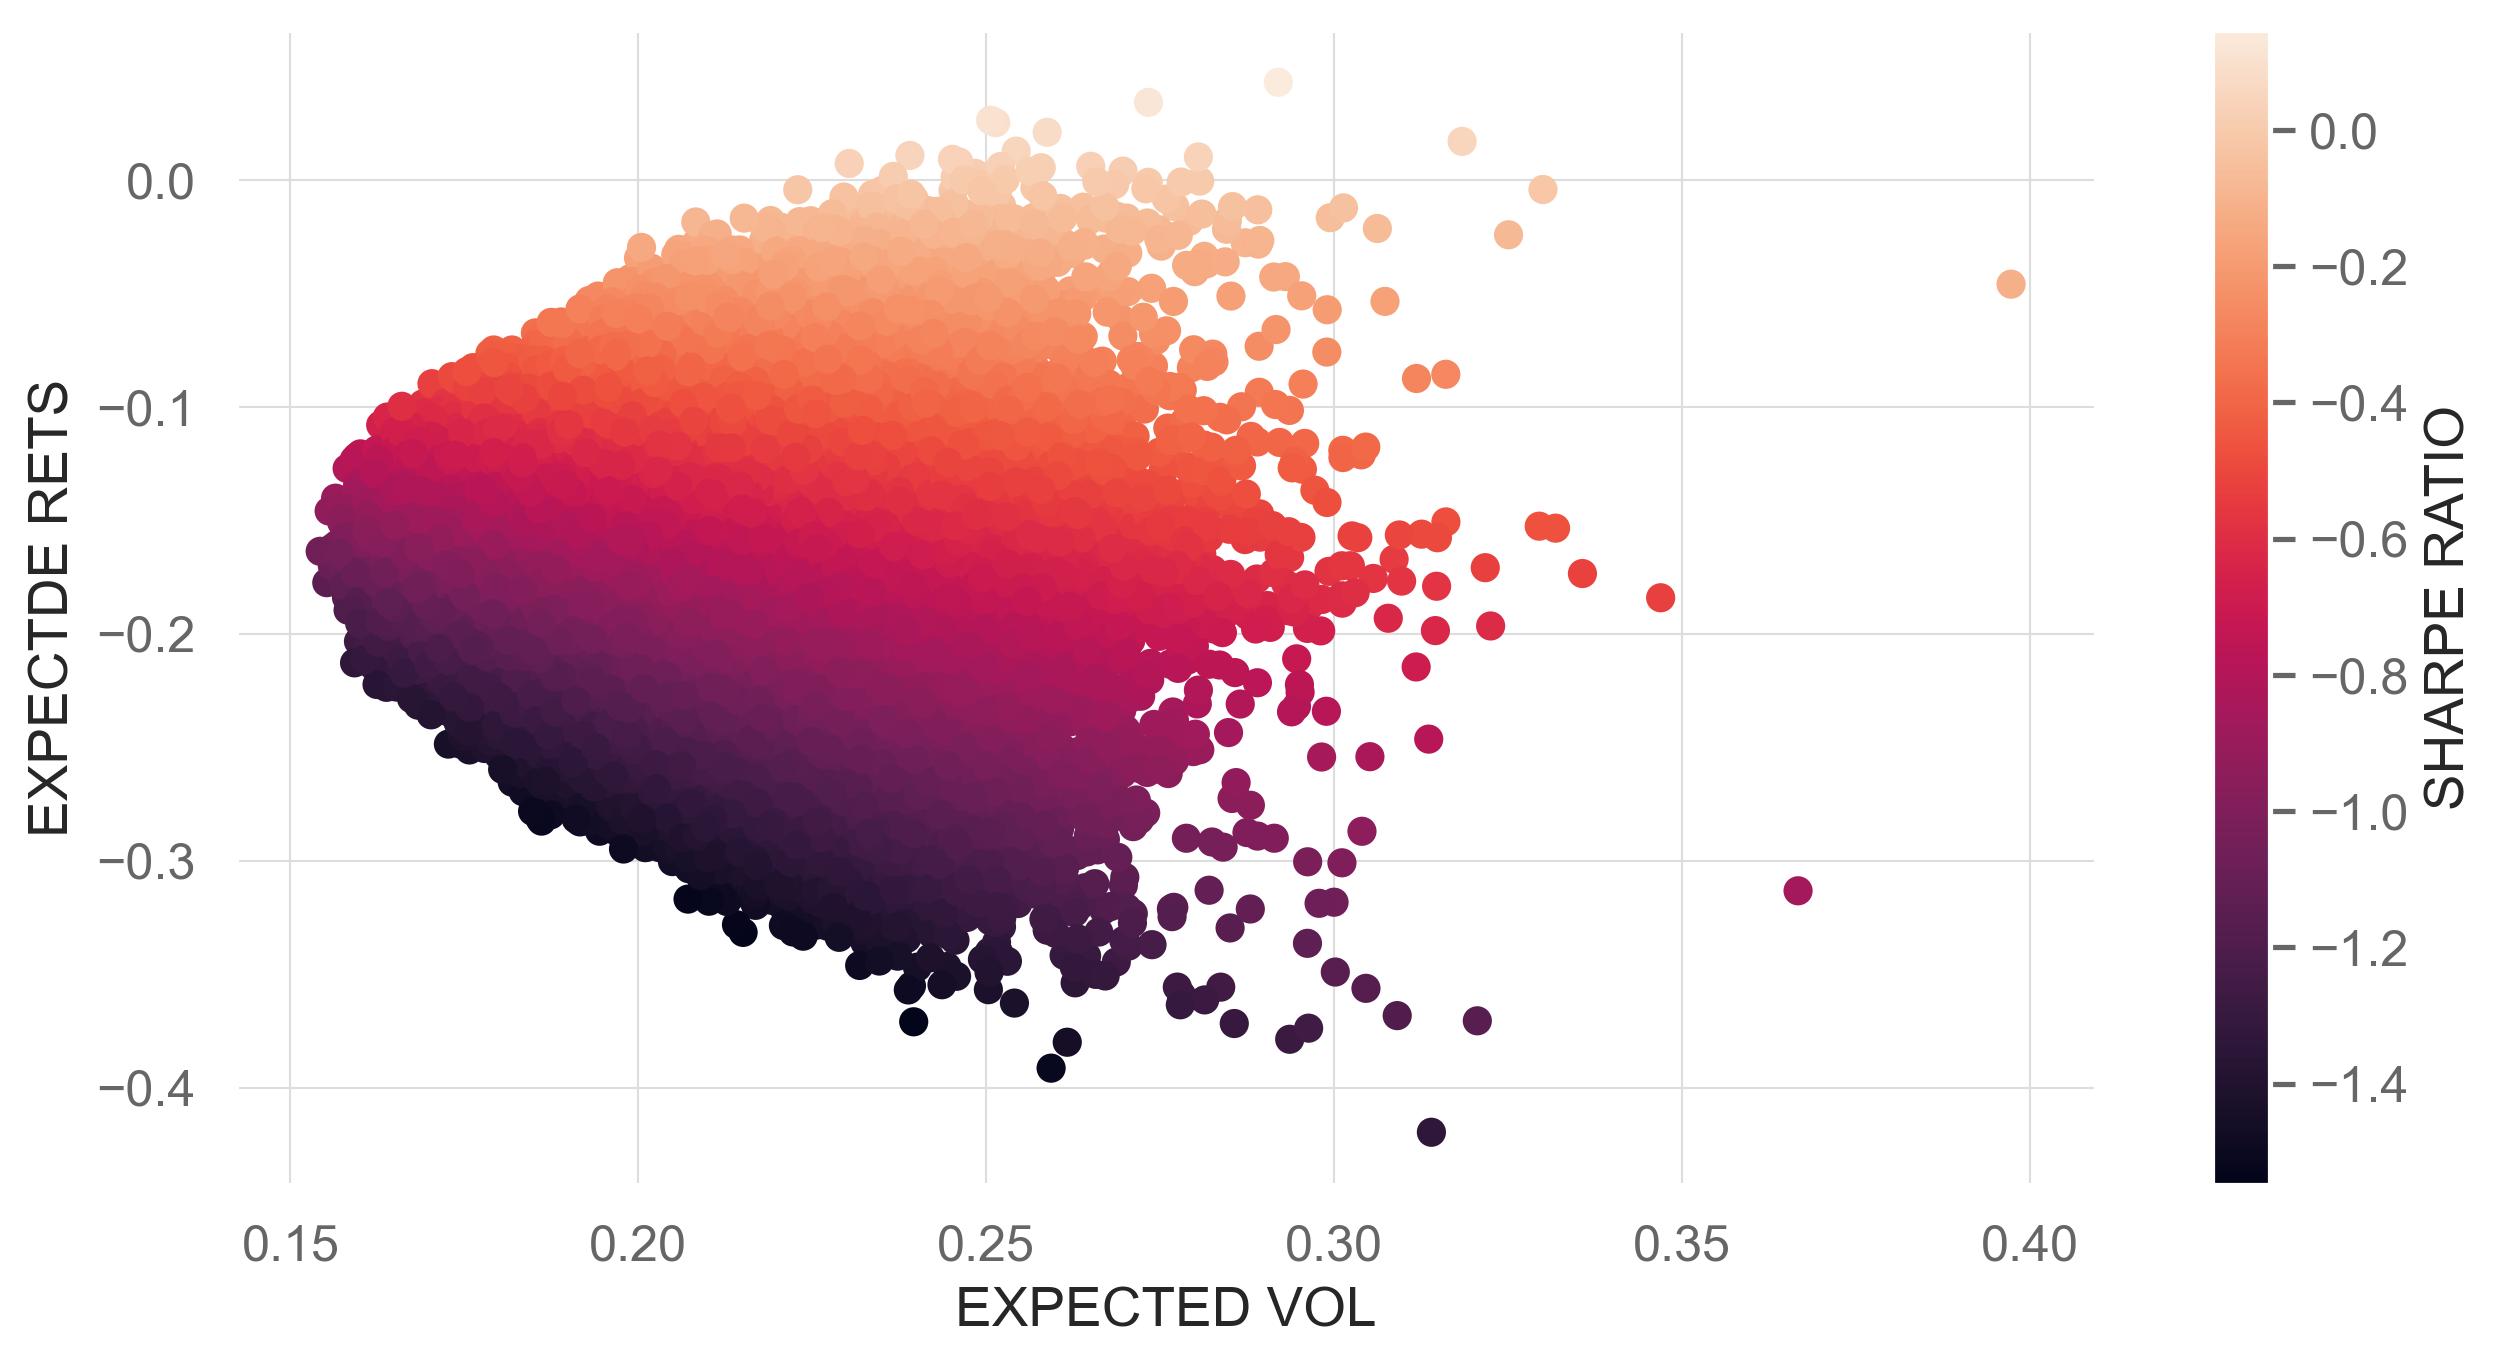

In [208]:
plt.figure(dpi=300,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTDE RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

plt.savefig("my_plot.png", dpi=300, bbox_inches='tight')

### Now, we can get the most sharp ratio

In [213]:
# the most highest sharpe ratio
mc_weights = mc_weights[np.argmax(mc_sharpe_ratios)]
mc_weights

array([0.04175126, 0.00831587, 0.14674569, 0.02413544, 0.04932727,
       0.05700826, 0.33231033, 0.13231267, 0.02739197, 0.18070124])

In [214]:
rmc_weights = np.round(mc_weights,2)
rmc_weights

array([0.04, 0.01, 0.15, 0.02, 0.05, 0.06, 0.33, 0.13, 0.03, 0.18])

## Buy & Hold Strategy (No Indicators, No Signals)

In this version of the notebook, **we do not use any trading strategies or technical indicators**.  
Instead, we simply construct a portfolio by selecting stocks based on net profit growth and apply a buy-and-hold approach.

- **No signals, no timing, no indicators.**
- **Just buy and hold the selected stocks throughout the period.**

Our goal is to see if this straightforward approach can **outperform the benchmark**, which is the **SET Index**.

Let's compare the performance of our buy-and-hold portfolio against the SET Index and see if simple can beat the market!

In [219]:
start_date = "2018-01-01"
end_date = "2025-06-01"

sc = ez.SETSignalCreator(
    start_date=start_date,
    end_date=end_date,
    index_list=[],
    symbol_list=top_ten,
)

In [230]:
df_close3 = sc.get_data("close", "daily")
df_close3

,BKD,CH,CPF,FTI,GGC,HTECH,JTS,OR,SGC,TFM
2018-01-03,2.80,NaN,24.80,NaN,15.30,8.55,1.70,NaN,NaN,NaN
2018-01-04,2.80,NaN,24.50,NaN,15.50,8.65,1.70,NaN,NaN,NaN
2018-01-05,2.80,NaN,24.40,NaN,15.80,8.60,1.70,NaN,NaN,NaN
2018-01-08,2.78,NaN,24.20,NaN,15.50,8.50,1.72,NaN,NaN,NaN
2018-01-09,2.76,NaN,24.30,NaN,15.40,8.50,1.72,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,1.23,1.88,25.50,1.87,4.50,2.68,41.75,12.6,0.74,4.86
2025-05-27,1.24,1.88,25.25,1.86,4.50,2.66,40.00,12.2,0.76,4.82
2025-05-28,1.20,1.90,25.00,1.86,4.56,2.66,38.75,12.2,0.74,4.78
2025-05-29,1.21,1.88,25.00,1.86,4.56,2.66,37.75,12.1,0.75,4.84


In [231]:
signal_df = pd.DataFrame(False, index=df_close3.index, columns=df_close3.columns)
signal_df.iloc[0] = True
signal_df

,BKD,CH,CPF,FTI,GGC,HTECH,JTS,OR,SGC,TFM
2018-01-03,True,True,True,True,True,True,True,True,True,True
2018-01-04,False,False,False,False,False,False,False,False,False,False
2018-01-05,False,False,False,False,False,False,False,False,False,False
2018-01-08,False,False,False,False,False,False,False,False,False,False
2018-01-09,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,False,False,False,False,False,False,False,False,False,False
2025-05-27,False,False,False,False,False,False,False,False,False,False
2025-05-28,False,False,False,False,False,False,False,False,False,False
2025-05-29,False,False,False,False,False,False,False,False,False,False


### Next, Create Backtest Algorithym

In [ ]:
# สร้าง dict เก็บว่าแต่ละหุ้นใช้สัดส่วนเท่าไหร่
weight_dict = {}

for i in range (10):
    weight_dict[top_ten[i]] = rmc_weights[i]

In [343]:
port_value_list = []
prev_ts = "2017-01-01"

def backtest_algorithm(c: Context):
    global prev_ts
    if c.volume > 0:
        print(c.symbol,c.volume,round(100 * (c.close_price / c.cost_price - 1), 2),"%",)

    if c.ts != prev_ts:
        port_value_list.append((c.ts, c.port_value))
        prev_ts = c.ts
    
    # ทำแบบนี้คือ ซื้อเมื่อมีสัญญาณขายเมื่อไม่มีสัญญาณ ไม่เหมาะกับ buy and hold
    # if c.signal:
    #     return c.target_pct_port(weight_dict.get(c.symbol, 0))
    # else:
    #     return c.target_pct_port(0)

    if c.signal:
        return c.buy_pct_port(weight_dict.get(c.symbol, 0))        
    elif c.ts == '2025-05-30':                   # ขายเมื่อตอนจบแล้ว
        return c.sell_pct_position(1.0) 
    else:
        return 0


In [344]:
# Run Backtest
result = ez.backtest(
    signal_df=signal_df,
    backtest_algorithm=backtest_algorithm,
    start_date=start_date,
    end_date=end_date,
    initial_cash=1e6,
    pct_commission=0.25,
    pct_buy_slip=0.0,
    pct_sell_slip=0.0,
    price_match_mode="weighted",
    signal_delay_bar=1,
)

BKD 3500.0 -0.18 %
CPF 1600.0 0.61 %
GGC 21500.0 0.16 %
HTECH 3500.0 0.0 %
JTS 29500.0 -0.44 %
BKD 7000.0 -0.18 %
CPF 3200.0 -0.41 %
GGC 43000.0 0.73 %
HTECH 7000.0 0.8 %
JTS 58800.0 -0.07 %
BKD 7000.0 -0.18 %
CPF 3200.0 -0.81 %
GGC 43000.0 2.68 %
HTECH 7000.0 0.22 %
JTS 58800.0 -0.07 %
BKD 7000.0 -0.89 %
CPF 3200.0 -1.63 %
GGC 43000.0 0.73 %
HTECH 7000.0 -0.95 %
JTS 58800.0 1.1 %
BKD 7000.0 -1.6 %
CPF 3200.0 -1.22 %
GGC 43000.0 0.08 %
HTECH 7000.0 -0.95 %
JTS 58800.0 1.1 %
BKD 7000.0 -2.32 %
CPF 3200.0 0.0 %
GGC 43000.0 0.08 %
HTECH 7000.0 -0.95 %
JTS 58800.0 2.28 %
BKD 7000.0 -1.6 %
CPF 3200.0 0.0 %
GGC 43000.0 -0.57 %
HTECH 7000.0 0.22 %
JTS 58800.0 2.28 %
BKD 7000.0 -0.89 %
CPF 3200.0 -0.81 %
GGC 43000.0 -0.57 %
HTECH 7000.0 -0.95 %
JTS 58800.0 1.1 %
BKD 7000.0 -1.6 %
CPF 3200.0 -0.81 %
GGC 43000.0 -0.57 %
HTECH 7000.0 -2.11 %
JTS 58800.0 0.51 %
BKD 7000.0 10.52 %
CPF 3200.0 -1.22 %
GGC 43000.0 3.98 %
HTECH 7000.0 0.22 %
JTS 58800.0 -0.07 %
BKD 7000.0 9.8 %
CPF 3200.0 0.0 %
GGC 430

In [ ]:
#result.to_excel('C:\\Users\\siraw\\Downloads\\Example.xlsx')

In [345]:
port_value_list

[(Timestamp('2018-01-03 00:00:00'), 1000000.0),
 (Timestamp('2018-01-04 00:00:00'), 999393.8343750002),
 (Timestamp('2018-01-05 00:00:00'), 1002588.6975000002),
 (Timestamp('2018-01-08 00:00:00'), 1014818.6975000002),
 (Timestamp('2018-01-09 00:00:00'), 1001614.6975000002),
 (Timestamp('2018-01-10 00:00:00'), 997494.6975000002),
 (Timestamp('2018-01-11 00:00:00'), 999490.6975000002),
 (Timestamp('2018-01-12 00:00:00'), 996030.6975000002),
 (Timestamp('2018-01-15 00:00:00'), 993654.6975000002),
 (Timestamp('2018-01-16 00:00:00'), 992226.6975000002),
 (Timestamp('2018-01-17 00:00:00'), 1025198.6975000002),
 (Timestamp('2018-01-18 00:00:00'), 1031268.6975000002),
 (Timestamp('2018-01-19 00:00:00'), 1014132.6975000002),
 (Timestamp('2018-01-22 00:00:00'), 1010574.6975000002),
 (Timestamp('2018-01-23 00:00:00'), 1005114.6975000002),
 (Timestamp('2018-01-24 00:00:00'), 1005886.6975000002),
 (Timestamp('2018-01-25 00:00:00'), 1010746.6975000002),
 (Timestamp('2018-01-26 00:00:00'), 996596.697

In [329]:
import seaborn as sns

<Axes: ylabel='year'>

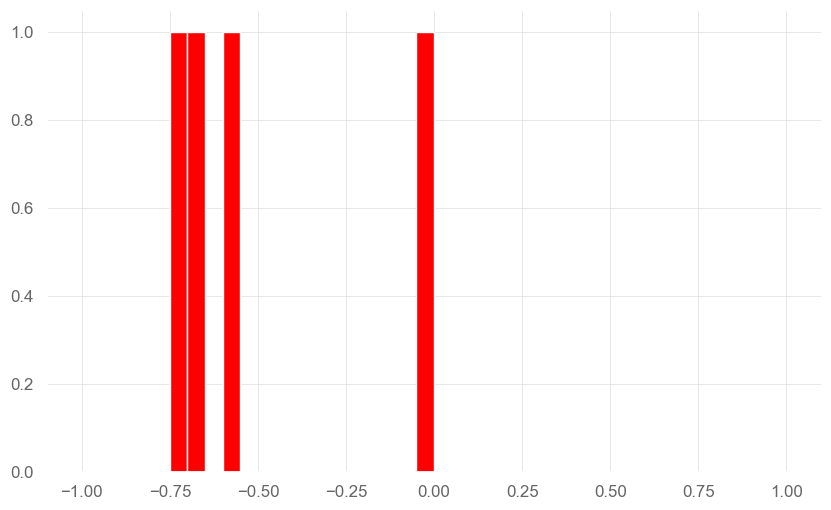

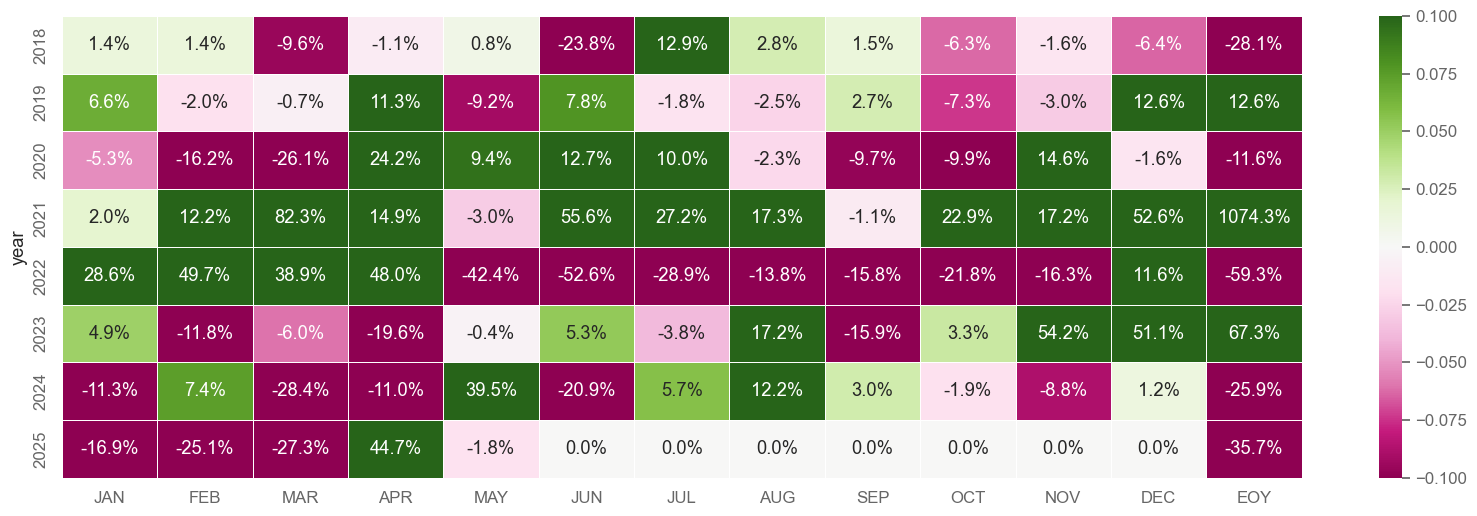

In [346]:
#Show Result

fig, ax = plt.subplots()
N, bins, patches = ax.hist(result.summary_trade_df['pct_return'], edgecolor='white', linewidth=1, bins = [-1,-.95,-.90,-.85,-.80,-.75,-.70,-.65,-.6,-.55,-.5,-.45,-.4,-.35,-.3,-.25,-.2,-.15,-.1,-.05, 0,0.001, .05, .10, .15, .20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95,1])

for i in range(0,len(patches)):
  if(patches[i].xy[0] <= 0):
    patches[i].set_facecolor('red')
  else:
    patches[i].set_facecolor('green')

return_table = (result.monthly_return_df.loc['portfolio']).replace(np.nan,0)
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(return_table, annot=True, fmt=".1%", linewidths=.5, ax=ax , cmap="PiYG",vmin = -0.1, vmax =0.1)

### Plot return compare with Benchmark(SET Index)

In [347]:
# Download set index data
import yfinance as yf 

In [295]:
set_index = yf.download('^SET.BK', start = start_date,end = end_date)
set_index.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^SET.BK,^SET.BK,^SET.BK,^SET.BK,^SET.BK
Date,,,,,
2018-01-03,1778.530029,1779.550049,1758.069946,1759.609985,12689600
2018-01-04,1791.020020,1791.390015,1779.280029,1786.640015,13110700
2018-01-05,1795.449951,1803.930054,1787.339966,1793.890015,12718100
2018-01-08,1792.810059,1813.170044,1792.810059,1799.589966,12087600
2018-01-09,1795.209961,1798.689941,1784.750000,1795.890015,13874900


In [296]:
set_index = set_index.reset_index()

In [297]:
set_index['%_Change'] = set_index['Close'].pct_change(1)
set_index

Price,Date,Close,High,Low,Open,Volume,%_Change
Ticker,,^SET.BK,^SET.BK,^SET.BK,^SET.BK,^SET.BK,
0,2018-01-03,1778.530029,1779.550049,1758.069946,1759.609985,12689600,NaN
1,2018-01-04,1791.020020,1791.390015,1779.280029,1786.640015,13110700,0.007023
2,2018-01-05,1795.449951,1803.930054,1787.339966,1793.890015,12718100,0.002473
3,2018-01-08,1792.810059,1813.170044,1792.810059,1799.589966,12087600,-0.001470
4,2018-01-09,1795.209961,1798.689941,1784.750000,1795.890015,13874900,0.001339
...,...,...,...,...,...,...,...
1790,2025-05-26,1178.430054,1180.030029,1168.170044,1178.719971,2797100,0.001760
1791,2025-05-27,1163.420044,1176.339966,1159.609985,1176.339966,3162700,-0.012737
1792,2025-05-28,1160.739990,1173.680054,1160.589966,1167.979980,3297900,-0.002304


In [298]:
set_index['%_Change'] = set_index['%_Change'] + 1

In [299]:
set_index['Money'] = set_index['%_Change'].cumprod()
set_index['Money'] = set_index['Money']*1000000
set_index = set_index.dropna()
set_index.head()

Price,Date,Close,High,Low,Open,Volume,%_Change,Money
Ticker,,^SET.BK,^SET.BK,^SET.BK,^SET.BK,^SET.BK,,
1,2018-01-04,1791.020020,1791.390015,1779.280029,1786.640015,13110700,1.007023,1.007023e+06
2,2018-01-05,1795.449951,1803.930054,1787.339966,1793.890015,12718100,1.002473,1.009513e+06
3,2018-01-08,1792.810059,1813.170044,1792.810059,1799.589966,12087600,0.998530,1.008029e+06
4,2018-01-09,1795.209961,1798.689941,1784.750000,1795.890015,13874900,1.001339,1.009378e+06
5,2018-01-10,1794.920044,1807.089966,1791.819946,1803.140015,13491400,0.999839,1.009215e+06


In [348]:
df_port_value = pd.DataFrame(port_value_list, columns=['Timestamp_with_Time', 'Value'])

df_port_value['Date'] = df_port_value['Timestamp_with_Time'].dt.date
df_port_value['Date'] = pd.to_datetime(df_port_value['Date'])
processed_port_value = df_port_value.groupby('Date')['Value'].last().reset_index()
processed_port_value

,Date,Value
0,2018-01-03,1.000000e+06
1,2018-01-04,9.993938e+05
2,2018-01-05,1.002589e+06
3,2018-01-08,1.014819e+06
4,2018-01-09,1.001615e+06
...,...,...
1796,2025-05-26,2.851909e+06
1797,2025-05-27,2.834949e+06
1798,2025-05-28,2.731179e+06
1799,2025-05-29,2.659179e+06


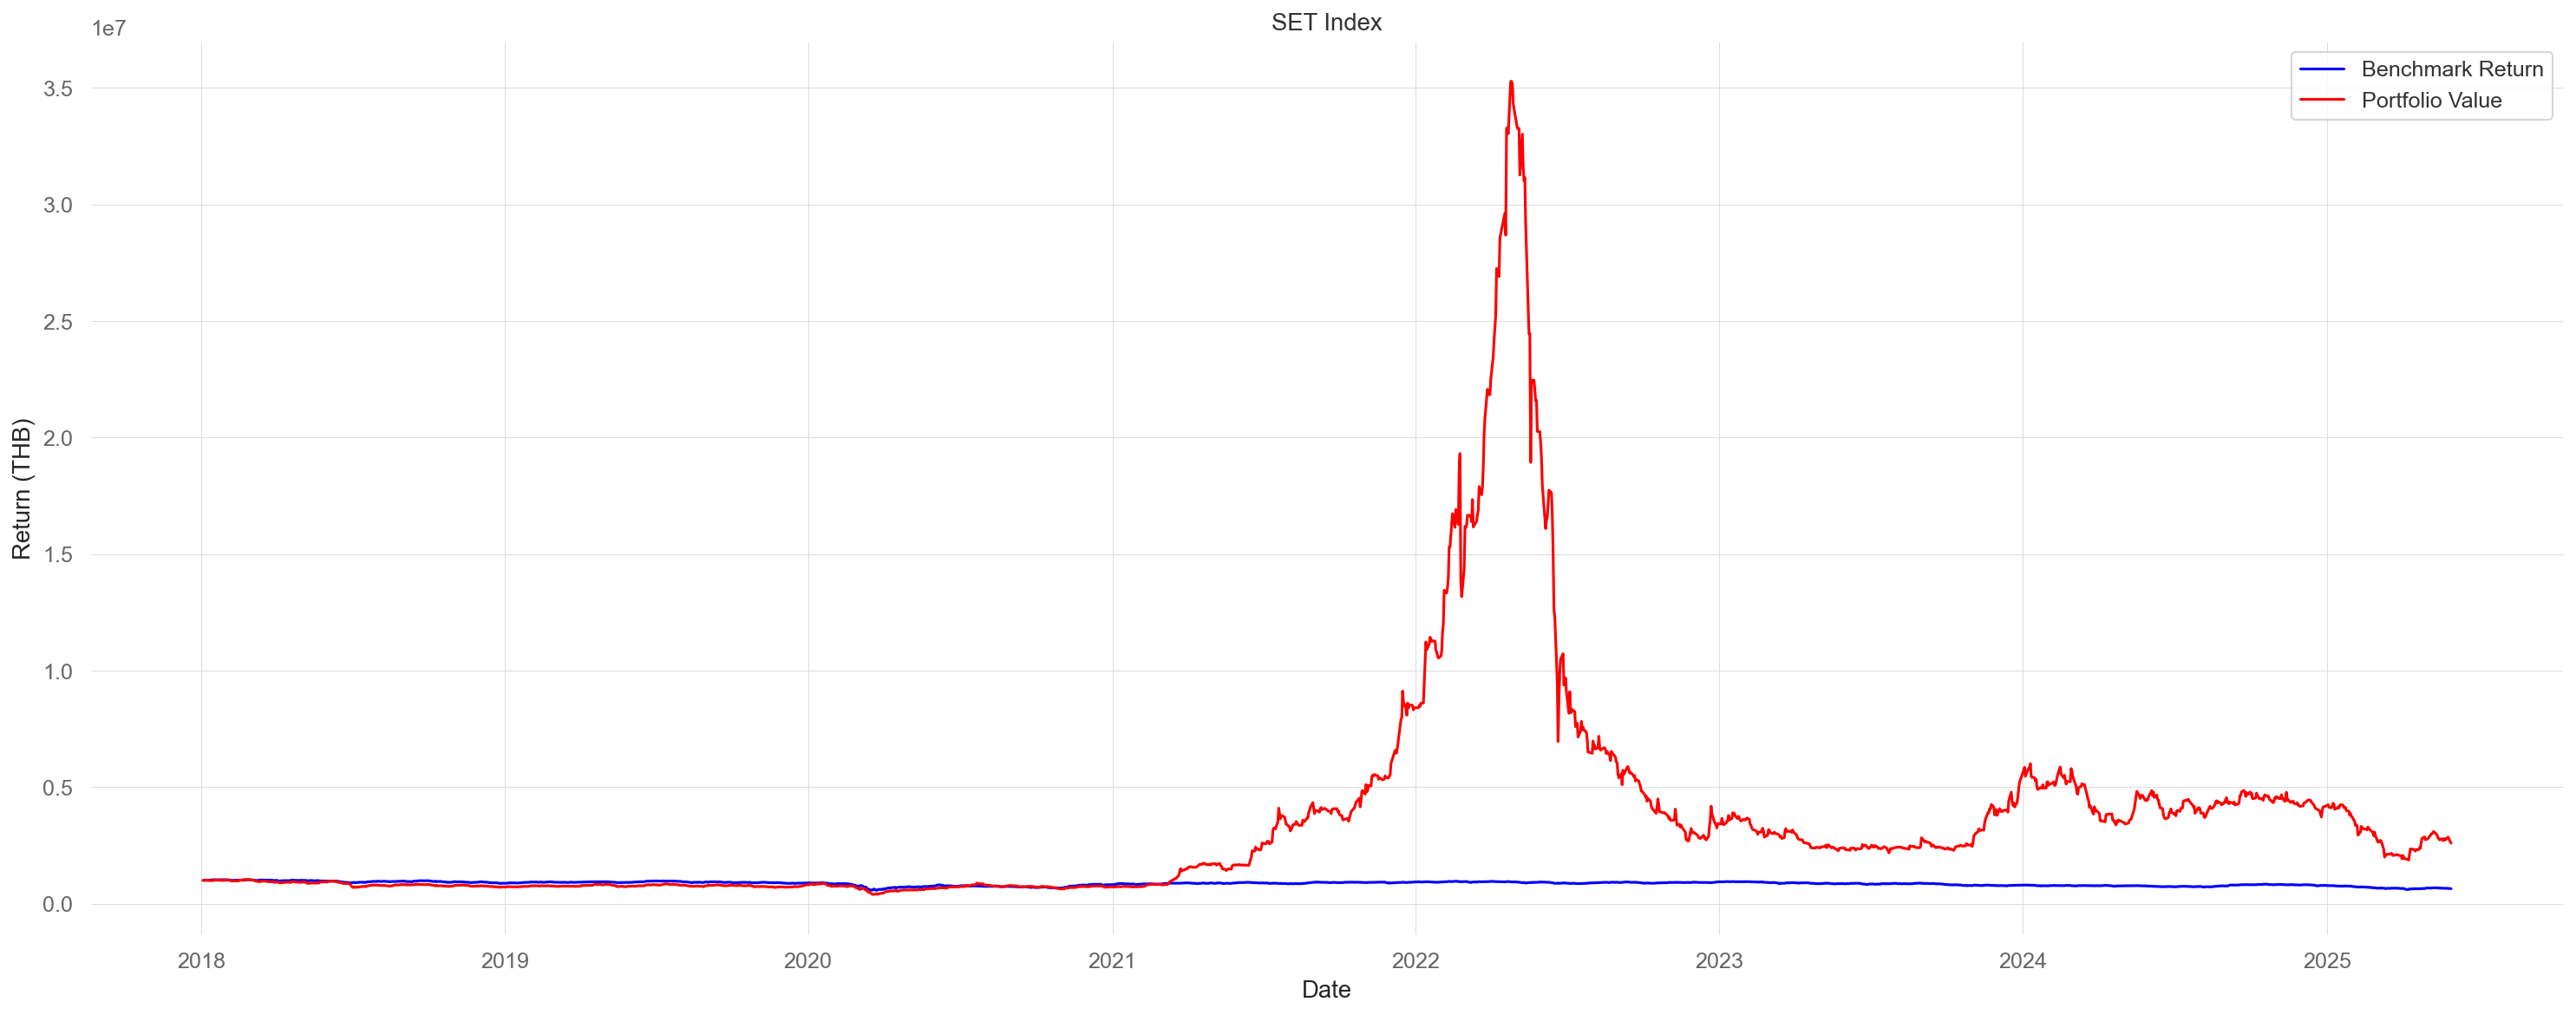

In [349]:
fig, ax = plt.subplots(figsize=(20, 8),dpi = 150)

ax.plot(set_index['Date'], set_index['Money'], label='Benchmark Return', color='blue')
ax.plot(processed_port_value['Date'], processed_port_value['Value'], label='Portfolio Value', color='red')


ax.set_title('SET Index')
ax.set_xlabel('Date')
ax.set_ylabel('Return (THB)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()